# Problem Statement:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

Clustering would be perfomred on the below features: **gdpp, child_mort and income**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [26]:
df=pd.read_csv('Country-data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


As seen from info we dont have any null values for the data set. Need to analyze to outliers

In [9]:
col=df.describe().columns

In [10]:
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

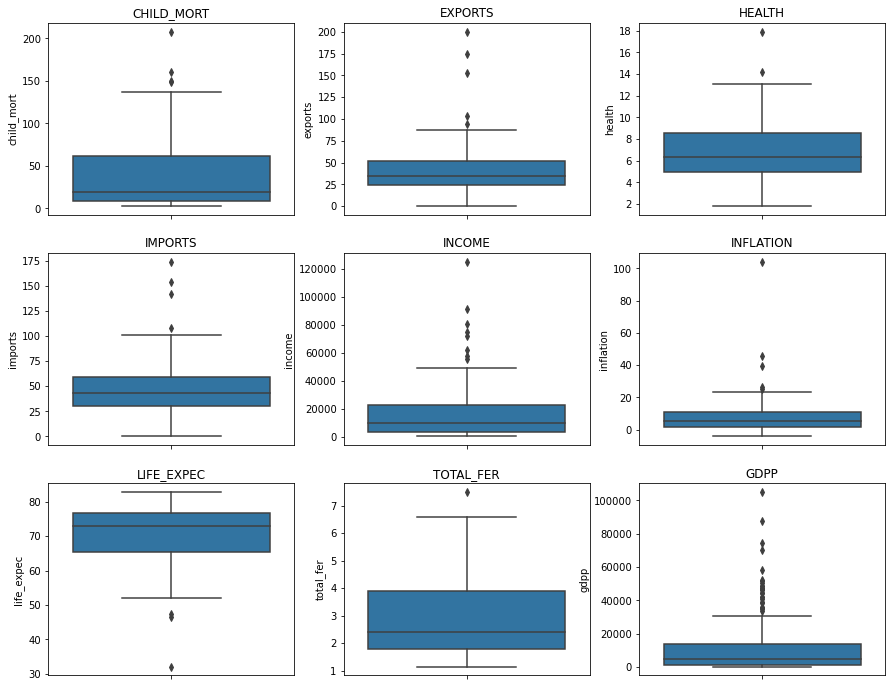

In [14]:
plt.figure(figsize=[15,12])

for i,var in enumerate(col):
    ax=plt.subplot(3,3,i+1)
    sns.boxplot(data=df, y=var, ax=ax)
    ax.set_title(var.upper())

plt.show()
    

A backward country would be classified as the one that has High Child mortality rate, Low income, low expenditure on Heakth infrastructure, Low life expectency, usually a high fertility rate and low GDPP.

The Exports of such countries are usually low and the imports would depend on the exports. Inflation would depend on a number of parameters too. So these three parameters that are Export, Import and Inflation would be omitted for now.

In [16]:
df=df.drop(['exports','imports','inflation'],axis=1)

In [17]:
df.head()

,country,child_mort,health,income,life_expec,total_fer,gdpp
0,Afghanistan,90.2,7.58,1610,56.2,5.82,553
1,Albania,16.6,6.55,9930,76.3,1.65,4090
2,Algeria,27.3,4.17,12900,76.5,2.89,4460
3,Angola,119.0,2.85,5900,60.1,6.16,3530
4,Antigua and Barbuda,10.3,6.03,19100,76.8,2.13,12200


**Outlier Treatment**

In [19]:
df[df.child_mort>120]

,country,child_mort,health,income,life_expec,total_fer,gdpp
31,Central African Republic,149.0,3.98,888,47.5,5.21,446
32,Chad,150.0,4.53,1930,56.5,6.59,897
66,Haiti,208.0,6.91,1500,32.1,3.33,662
97,Mali,137.0,4.98,1870,59.5,6.55,708
112,Niger,123.0,5.16,814,58.8,7.49,348
113,Nigeria,130.0,5.07,5150,60.5,5.84,2330
132,Sierra Leone,160.0,13.10,1220,55.0,5.20,399


In [29]:
# Imputing the value of data points that is above 150 for child_mort feature to 150

df.loc[(df.child_mort>150),'child_mort']=150

In [32]:
df[df.health>12]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.80,65.4,3.46,2860
132,Sierra Leone,150.0,16.8,13.1,34.5,1220,17.20,55.0,5.20,399
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400


In [35]:
# Imputing the value of data points that is above 12 for health feature to 12

df.loc[(df.health>12),'health']=12

In [40]:
df[df.income>50000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000


In [41]:
# Imputing the value of data points that is above 50000 for income feature to 50000

df.loc[(df.income>50000),'income']=50000

In [45]:
df[df.life_expec<50]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
66,Haiti,150.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170


In [46]:
# Imputing the value of data points that is less than 50 for life_expec feature to 50

df.loc[(df.life_expec<50),'life_expec']=50

In [49]:
df[df.total_fer>7]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348


In [50]:
# Imputing the value of data points that is above 7 for total_fer feature to 7

df.loc[(df.total_fer>7),'total_fer']=7

In [61]:
df[df.gdpp>55000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
91,Luxembourg,2.8,175.0,7.77,142.0,50000,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,50000,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,50000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.0,11.50,53.3,50000,0.317,82.2,1.52,74600


In [62]:
# Imputing the value of data points that is above 55000 for gdpp feature to 55000

df.loc[(df.gdpp>55000),'gdpp']=55000

#### Data Analysis

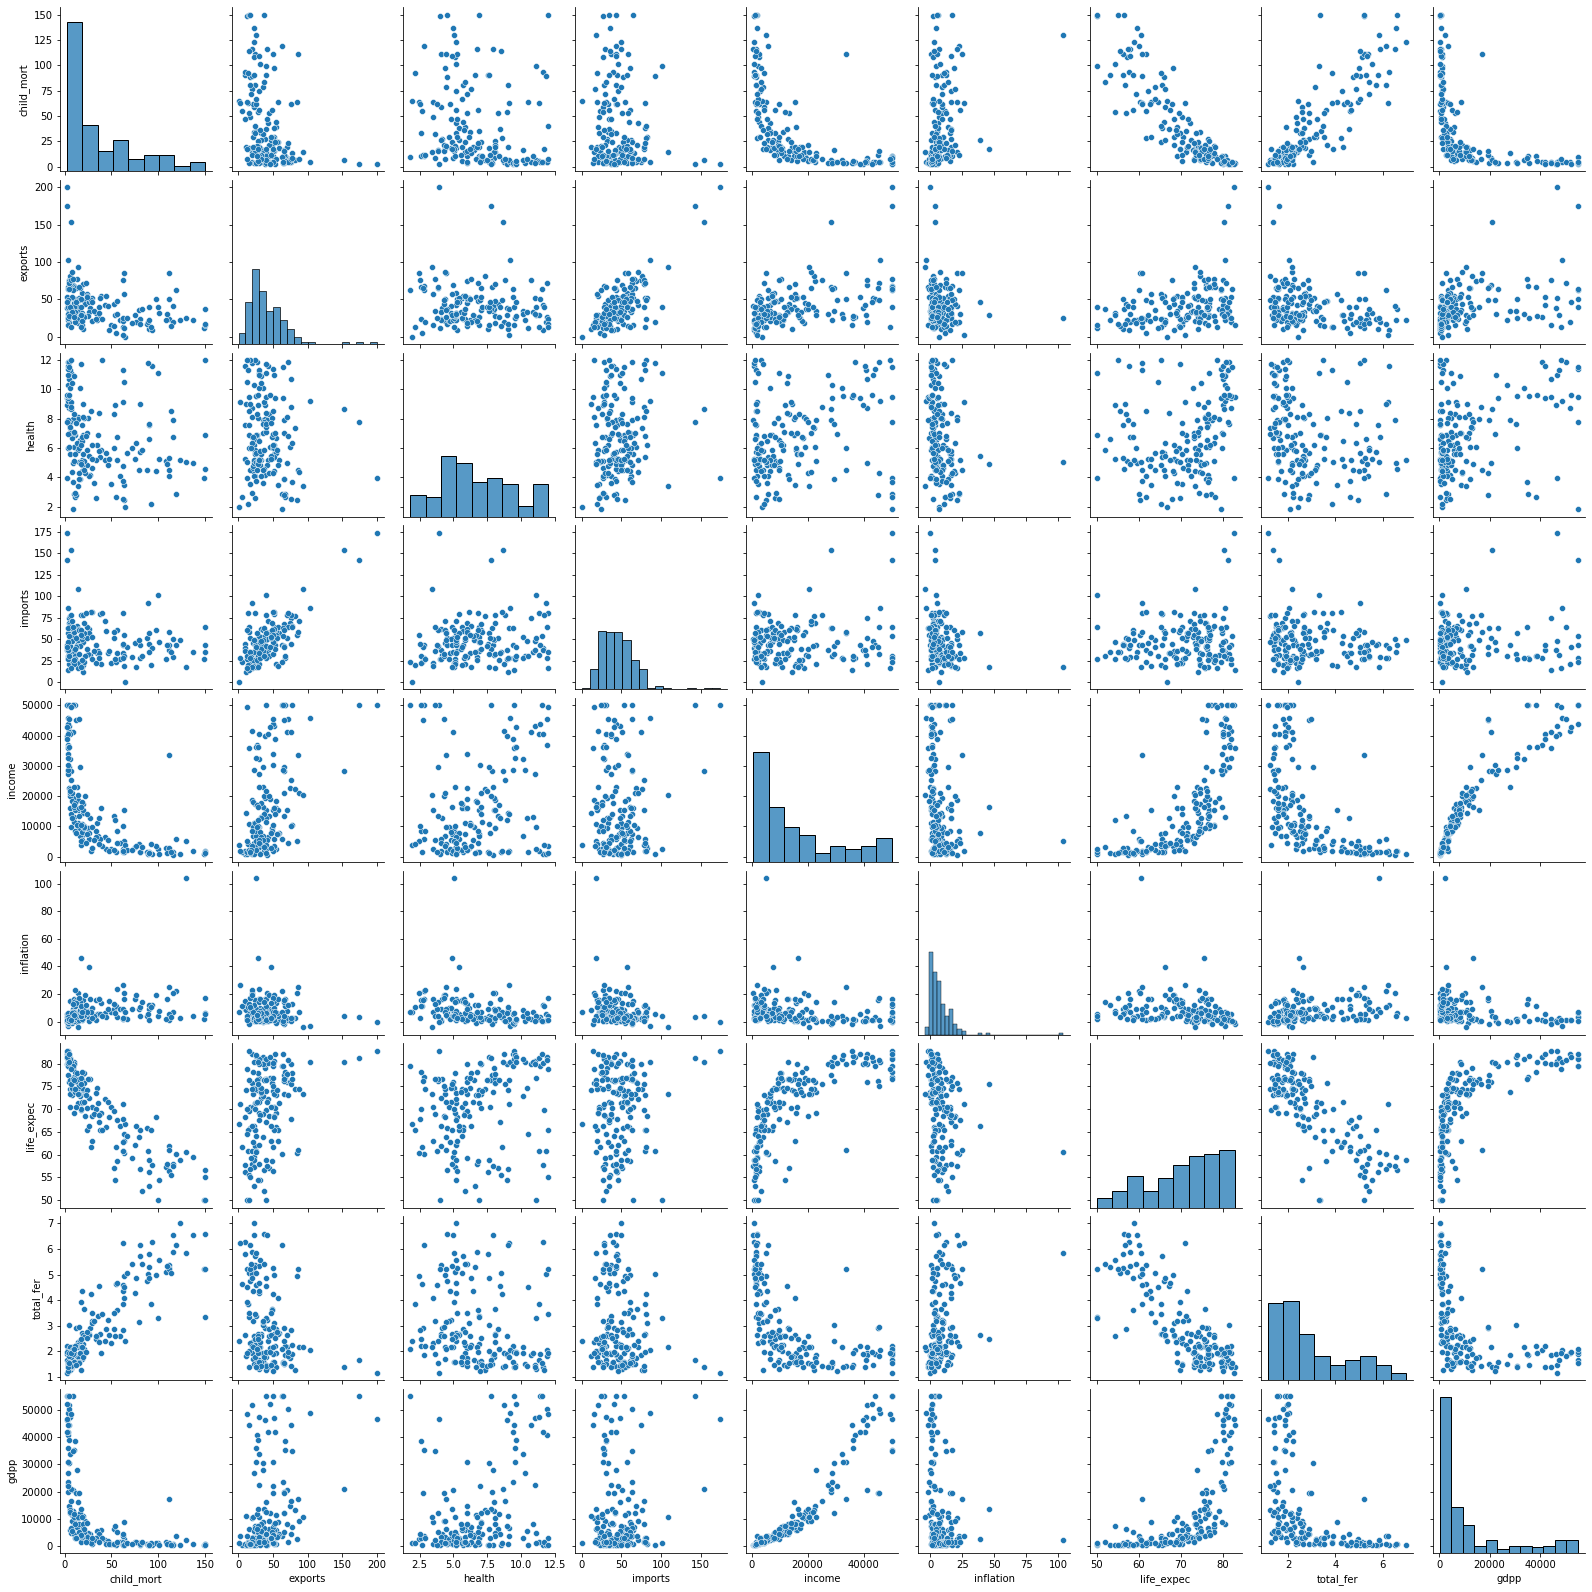

In [143]:
sns.pairplot(df[col])
plt.show()

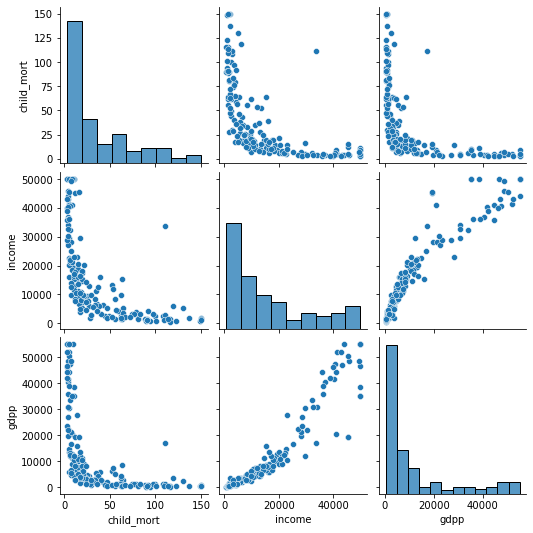

In [144]:
sns.pairplot(df[['child_mort','income','gdpp']])
plt.show()

**Data Preparation**

In [69]:
X=df[['child_mort','income','gdpp']]

In [70]:
#Rescaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [71]:
X.shape

(167, 3)

**Hopkins Statistics**

In [68]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [72]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [75]:
X=pd.DataFrame(X, columns=['child_mort','income','gdpp'])

,child_mort,income,gdpp
0,1.349188,-0.951517,-0.743000
1,-0.548131,-0.394688,-0.518162
2,-0.272298,-0.195916,-0.494642
3,2.091618,-0.664402,-0.553760
4,-0.710538,0.219029,-0.002632
...,...,...,...
162,-0.223318,-0.861835,-0.589357
163,-0.535242,0.045020,0.080006
164,-0.375413,-0.758768,-0.694879
165,0.475287,-0.759437,-0.694879


In [94]:
hopkins(X)

0.9559518796117594

Post running the Hopkins stats we can observe that the data is higly clustered as the hopkins stats value is generally above 0.85

### K-Means Clustering

Find the optimal number of clusters usnig the Elbow method and silhouette Score

In [104]:
num_clusters=list(range(2,8))

ssd=[]
silhouette=[]

for i,num in enumerate(num_clusters):
    kmeans=KMeans(n_clusters=num,max_iter=10).fit(X)
    
    ## SSD/ Elbow
    ssd.append(kmeans.inertia_)
    silhouette.append(f'For cluster {num}, the silhouette score is {metrics.silhouette_score(X,kmeans.labels_)}')

In [105]:
silhouette

['For cluster 2, the silhouette score is 0.5807669852226034',
 'For cluster 3, the silhouette score is 0.5549743160576879',
 'For cluster 4, the silhouette score is 0.47269009565902187',
 'For cluster 5, the silhouette score is 0.48353190548518826',
 'For cluster 6, the silhouette score is 0.46490990560226547',
 'For cluster 7, the silhouette score is 0.45289007993295866']

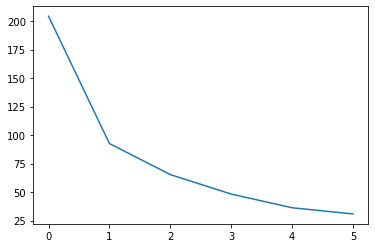

In [106]:
plt.plot(ssd)
plt.show()

As per the elbow curve we will take the number of clusters as 3. Also the silhouette score is 0.55 is quite good for num of cluster=3

In [108]:
kmeans=KMeans(n_clusters=3,max_iter=10).fit(X)

In [110]:
df['KM_Cluster'] =kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM_Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


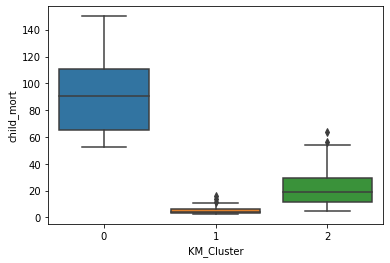

In [111]:
sns.boxplot(data=df,x='KM_Cluster',y='child_mort')
plt.show()

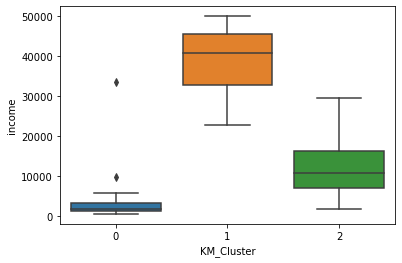

In [112]:
sns.boxplot(data=df,x='KM_Cluster',y='income')
plt.show()

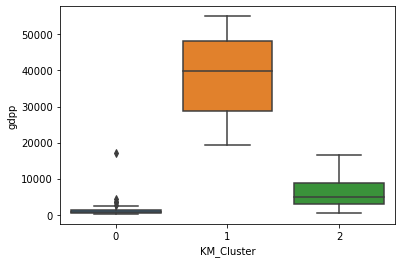

In [113]:
sns.boxplot(data=df,x='KM_Cluster',y='gdpp')
plt.show()

In [115]:
df[df['KM_Cluster']==0].shape

(46, 11)

In [116]:
df[df['KM_Cluster']==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM_Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0


As seen from above boxplots, cluster zero has the countries with lowest income and gdpp and highest child mortality rate. 
The list has a total of 46 countries.

## Hierarchical Clustering

Using Single Linkage to get optimal number of clusters

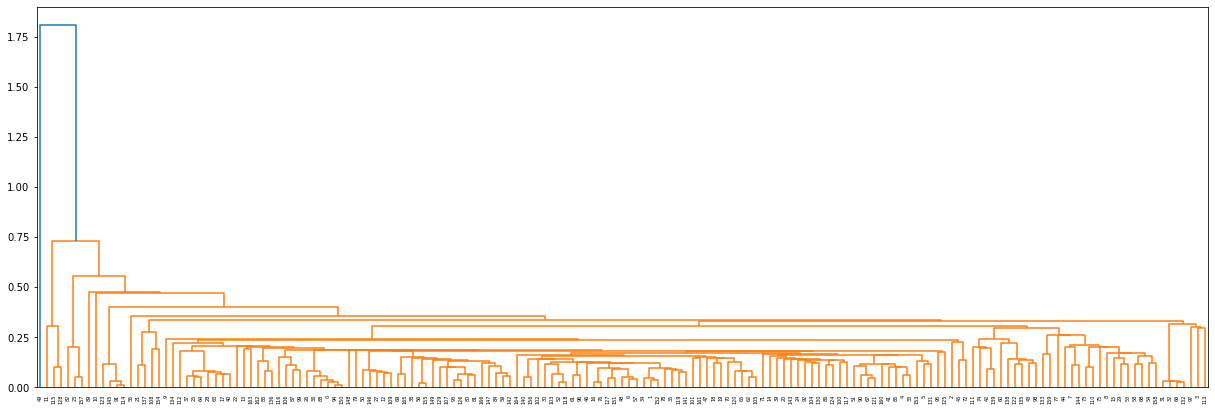

In [120]:
mergings_single=linkage(X,method='single',metric='euclidean')
plt.figure(figsize=[21,7])
dendrogram(mergings_single)
plt.show()

As seen from above, using the single linkage it is very hard to identify the number of clusters. <br>
We will use complete linkage now

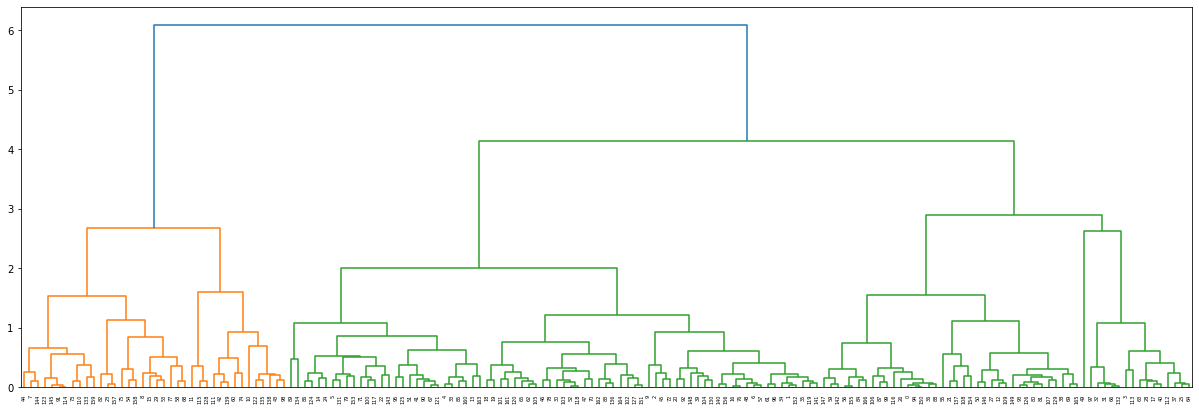

In [121]:
mergings_complete=linkage(X,method='complete',metric='euclidean')
plt.figure(figsize=[21,7])
dendrogram(mergings_complete)
plt.show()

As seen from above, using the complete linkage we can again take 3 clusters.

In [133]:
labels=cut_tree(mergings_complete, n_clusters=3).reshape(-1)

In [134]:
labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [135]:
df['HI_Cluster']=labels

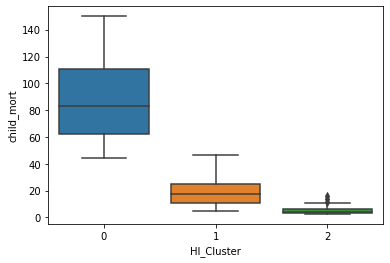

In [136]:
sns.boxplot(data=df,x='HI_Cluster',y='child_mort')
plt.show()

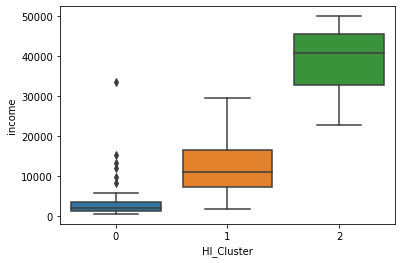

In [139]:
sns.boxplot(data=df,x='HI_Cluster',y='income')
plt.show()

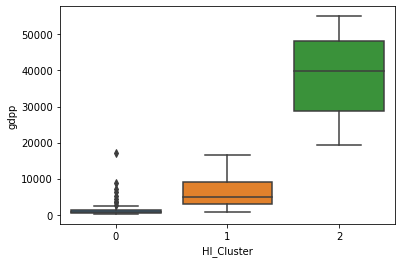

In [140]:
sns.boxplot(data=df,x='HI_Cluster',y='gdpp')
plt.show()

In [141]:
df[df['HI_Cluster']==0].shape

(53, 12)

In [142]:
df[df['HI_Cluster']==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM_Cluster,HI_Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,2,0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0,0
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,2,0


As seen from above boxplots, cluster zero has the countries with lowest income and gdpp and highest child mortality rate. 
The list has a total of 53 countries.

The countries with high child mortality leads to high total fertilization. Countries with high fertility generally have lower life expectancy.

Also its is known trend when the total fertility is more than the average income is less and so is lesser gdpp. The countries with high income has higher GDPP. Also as discussed previously, the countries with 

This is also captured by the clusters formed using the KMEANS and HIERARCHICAL Clusters.